In [1]:
import yfinance as yf
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/paulvillagrahuisa/data_science/Stocks/code


In [3]:
# Load stocks list from CSV into a DataFrame
def get_stock_symbols(stocks_list_filename):
    data_directory = "../data"
    stocks_list_filename = stocks_list_filename
    stocks_list_path = os.path.join(data_directory, stocks_list_filename)
    stock_symbols_df = pd.read_csv(stocks_list_path)
    return stock_symbols_df

stock_symbols_df = get_stock_symbols("TickerSymbols.csv")
print(stock_symbols_df.head(5), "\n")
print(stock_symbols_df.tail(5))

  symbol                       name
0      A  Agilent Technologies Inc.
1     AA          Alcoa Corporation
2   AAAU   Perth Mint Physical Gold
3   AABA                Altaba Inc.
4    AAC          AAC Holdings Inc. 

        symbol                name
8720   ICXUSDT            ICON USD
8721   NEOUSDT             NEO USD
8722   VENUSDT         VeChain USD
8723   XLMUSDT  Stellar Lumens USD
8724  QTUMUSDT            Qtum USD


In [ ]:
# Take a random sample of 50 elements from stock_symbols_df for code testing
# stock_symbols_df = stock_symbols_df.sample(n=50, random_state=42)  # You can adjust the number of samples and the random state as needed
# print(stock_symbols_df.head(5), "\n")
# print(stock_symbols_df.tail(5))

In [4]:
%%time
def get_stock_data(stock_symbols_df):
    # Create variables to count symbols evaluated and symbols not found
    symbols_evaluated = 0
    symbols_not_found = 0

    # Create a list to store stock dataframes
    stock_dfs = []

    # Fetch historical stock prices for the last 3 months using yfinance
    for index, row in stock_symbols_df.iterrows():
        symbol = row['symbol']
        name = row['name']
        try:
            stock = yf.Ticker(symbol)
            period = "3mo"
            history = stock.history(period=period)  # Fetching data for the last 90 days or 3 months
            if not history.empty:  # Check if data is available
                history.reset_index(inplace=True)
                history['Symbol'] = symbol  # Add Symbol column
                history['Name'] = name  # Add Name column
                history['Date'] = history['Date'].dt.date  # Extract only the date portion
                stock_dfs.append(history[['Date', 'Symbol', 'Name', 'Close']])  # Keep only Date, Symbol, Name and Close columns
                symbols_evaluated += 1
            else:
                # print(f"No data found for symbol {symbol}.")
                symbols_not_found += 1
        except yfinance.YFinanceError as e:
            print(f"Failed to fetch data for symbol {symbol}: {e}")
            symbols_not_found += 1

    print("\nSymbols Evaluated:", symbols_evaluated)
    print("Symbols Not Found:", symbols_not_found)
    
    # Concatenate all stock dataframes into a single dataframe
    print(len(stock_dfs))
    stock_data = pd.concat(stock_dfs, ignore_index=True)
    return stock_data

stock_data = get_stock_data(stock_symbols_df)
print(len(stock_data))
print(stock_data.head(5), "\n")
print(stock_data.tail(5))

AABA: No data found, symbol may be delisted
AAC: No data found, symbol may be delisted
AAWW: No data found, symbol may be delisted
AAXN: No data found, symbol may be delisted
ABB: No data found, symbol may be delisted
ABC: No data found, symbol may be delisted
ABDC: No data found, symbol may be delisted
ABEOW: No data found, symbol may be delisted
ABIL: No data found, symbol may be delisted
ABMD: No price data found, symbol may be delisted (period=3mo)
ABR-A: No data found, symbol may be delisted
ABR-B: No data found, symbol may be delisted
ABR-C: No data found, symbol may be delisted
ABTX: No data found, symbol may be delisted
ACBI: No data found, symbol may be delisted
ACC: No data found, symbol may be delisted
ACER: No data found, symbol may be delisted
ACGLP: No data found, symbol may be delisted
ACH: No data found, symbol may be delisted
ACHN: No data found, symbol may be delisted
ACIA: No data found, symbol may be delisted
ACRX: No data found, symbol may be delisted
ACY: No data 


Symbols Evaluated: 5660
Symbols Not Found: 3065
5660
347236
         Date Symbol                       Name       Close
0  2023-12-26      A  Agilent Technologies Inc.  139.573929
1  2023-12-27      A  Agilent Technologies Inc.  139.583923
2  2023-12-28      A  Agilent Technologies Inc.  139.534012
3  2023-12-29      A  Agilent Technologies Inc.  139.029999
4  2024-01-02      A  Agilent Technologies Inc.  138.750000 

              Date Symbol            Name  Close
347231  2024-03-19   ZYME  Zymeworks Inc.  10.53
347232  2024-03-20   ZYME  Zymeworks Inc.  10.75
347233  2024-03-21   ZYME  Zymeworks Inc.  10.65
347234  2024-03-22   ZYME  Zymeworks Inc.  10.52
347235  2024-03-25   ZYME  Zymeworks Inc.  10.40
CPU times: user 7min 50s, sys: 57 s, total: 8min 47s
Wall time: 4h 25min 29s


In [9]:
print(len(stock_data))
print(stock_data.head(5), "\n")
print(stock_data.tail(5))

347236
         Date Symbol                       Name       Close
0  2023-12-26      A  Agilent Technologies Inc.  139.573929
1  2023-12-27      A  Agilent Technologies Inc.  139.583923
2  2023-12-28      A  Agilent Technologies Inc.  139.534012
3  2023-12-29      A  Agilent Technologies Inc.  139.029999
4  2024-01-02      A  Agilent Technologies Inc.  138.750000 

              Date Symbol            Name  Close
347231  2024-03-19   ZYME  Zymeworks Inc.  10.53
347232  2024-03-20   ZYME  Zymeworks Inc.  10.75
347233  2024-03-21   ZYME  Zymeworks Inc.  10.65
347234  2024-03-22   ZYME  Zymeworks Inc.  10.52
347235  2024-03-25   ZYME  Zymeworks Inc.  10.40


In [5]:
# Define a custom aggregation function
def custom_agg_dates_close_return(x):
    min_date = x['Date'].idxmin()
    max_date = x['Date'].idxmax()
    return pd.Series({
        'min_date': x.loc[min_date, 'Date'],
        'max_date': x.loc[max_date, 'Date'],
        'Close_min_date': x.loc[min_date, 'Close'],
        'Close_max_date': x.loc[max_date, 'Close'],
        'Return (%)': ((x.loc[max_date, 'Close'] - x.loc[min_date, 'Close']) / x.loc[min_date, 'Close']) * 100
    })

# Group by Symbol and perform custom aggregation
stocks_growth = stock_data.groupby('Symbol').apply(custom_agg_dates_close_return, include_groups=False)

# Reset index to obtain a DataFrame
stocks_growth_df = stocks_growth.reset_index()

# Sort the DataFrame by "Return (%)" column in descending order
stocks_growth_df = stocks_growth_df.sort_values(by='Return (%)', ascending=False)

# Display the resulting DataFrame
print(stocks_growth_df.head(7),"\n")
print(stocks_growth_df.tail(7))

     Symbol    min_date    max_date  Close_min_date  Close_max_date  \
1487    ELC  2023-12-27  2024-03-25           0.340       23.160000   
3196   MBRX  2023-12-26  2024-03-25           0.648        5.086700   
1032   CRBP  2023-12-26  2024-03-25           5.400       35.930000   
1951   FNGD  2023-12-26  2024-03-25           5.700       35.349998   
1169   DAVE  2023-12-26  2024-03-25           8.210       39.369999   
1570     EQ  2023-12-26  2024-03-25           0.630        2.512200   
695    BYSI  2023-12-26  2024-03-25           0.909        3.340000   

       Return (%)  
1487  6711.764589  
3196   684.984560  
1032   565.370364  
1951   520.175433  
1169   379.537135  
1570   298.761926  
695    267.436743   

     Symbol    min_date    max_date  Close_min_date  Close_max_date  \
1865   FIXX  2023-12-26  2024-03-25       10.279799          0.9512   
90      AEY  2023-12-26  2024-03-22        2.260000          0.0650   
3646   NVTA  2023-12-26  2024-03-22        0.708100     

In [6]:
# Save stocks growth findings to a csv file
def save_stocks_growth_to_csv(x):
    
    # Define output directory and filename
    csv_directory = "../output/csv"
    current_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    stocks_growth_filename = f"stocks_growth_{current_datetime}.csv"
    stocks_growth_path = os.path.join(csv_directory, stocks_growth_filename)

    # Save the DataFrame to a CSV file
    x.to_csv(stocks_growth_path, index=False)

    # Print the filename for confirmation
    print(f"DataFrame saved to {stocks_growth_path}")
    
save_stocks_growth_to_csv(stocks_growth_df)

DataFrame saved to ../output/csv/stocks_growth_20240325_163754.csv


Plots saved to ../output/png/top_25_stocks_increasing_and_decreasing_20240325_163754.png


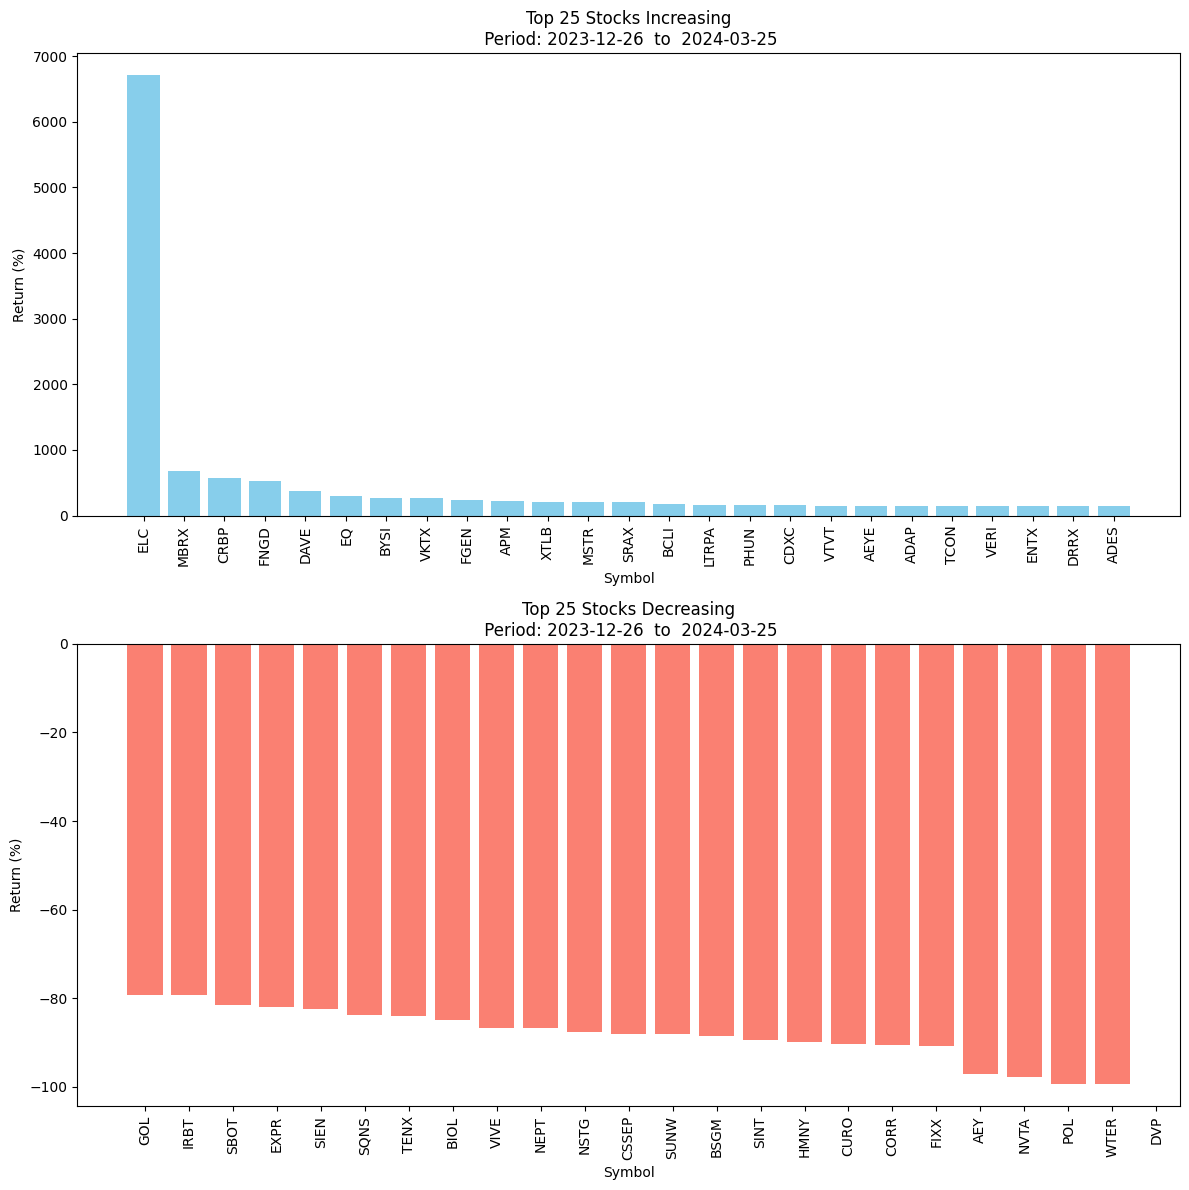

In [7]:
def plot_top_n_stocks(x, n=25):
    # Select the top n symbols by return
    top_n_stocks_increasing = x.head(n)
    top_n_stocks_decreasing = x.tail(n)

    # Define output directory and filename
    png_directory = "../output/png"
    current_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    plot_filename_increasing_and_decreasing = f"top_{n}_stocks_increasing_and_decreasing_{current_datetime}.png"
    plot_filename_increasing_and_decreasing_path = os.path.join(png_directory, plot_filename_increasing_and_decreasing)
    
    # Create the first plot: Top n Stocks Increasing
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
    plt.bar(top_n_stocks_increasing['Symbol'], top_n_stocks_increasing['Return (%)'], color='skyblue')
    plt.xlabel('Symbol')
    plt.ylabel('Return (%)')
    plt.title(f'Top {n} Stocks Increasing\n Period: {x["min_date"].min()}  to  {x["max_date"].max()}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Create the second plot: Top n Stocks Decreasing
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
    plt.bar(top_n_stocks_decreasing['Symbol'], top_n_stocks_decreasing['Return (%)'], color='salmon')
    plt.xlabel('Symbol')
    plt.ylabel('Return (%)')
    plt.title(f'Top {n} Stocks Decreasing\n Period: {x["min_date"].min()}  to  {x["max_date"].max()}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Save the 2 subplots
    plt.savefig(plot_filename_increasing_and_decreasing_path)
    # Print the filename for confirmation
    print(f"Plots saved to {plot_filename_increasing_and_decreasing_path}")

    # Show both plots
    plt.show()

# Example usage with default n=25
plot_top_n_stocks(stocks_growth_df) 

Plots saved to ../output/png/top_50_stocks_increasing_and_decreasing_20240325_163800.png


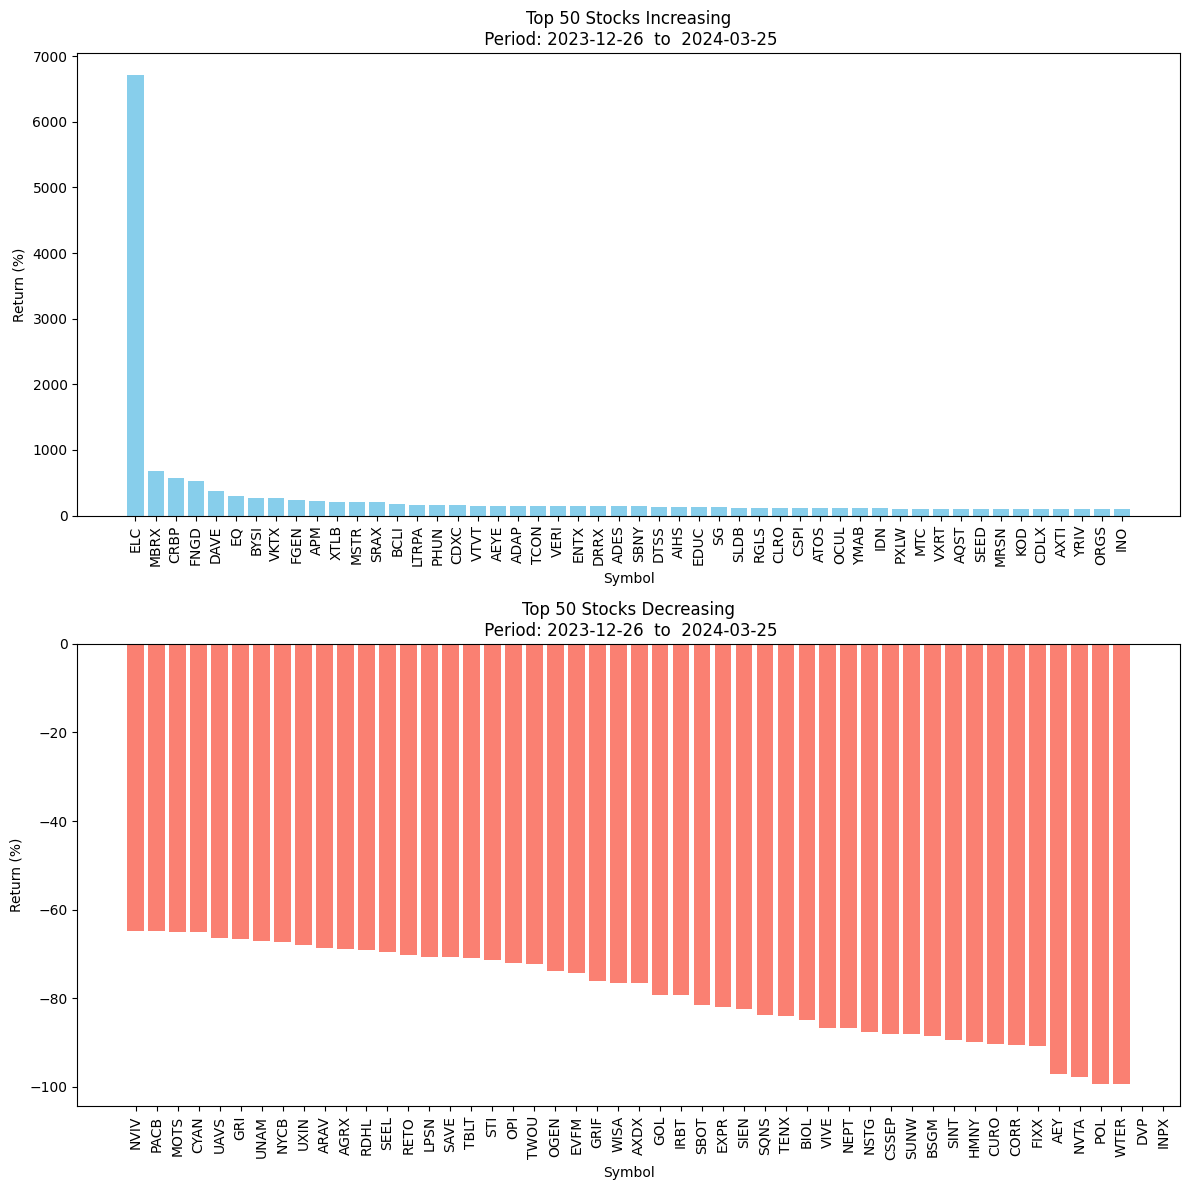

In [8]:
# Example usage, with n=50
plot_top_n_stocks(stocks_growth_df, 50)